In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datapipeline_uc3 import Datapipeline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

In [3]:
dpl = Datapipeline()

In [4]:
dict_hosp_filepaths = {
    'GHL': './Data Exploration/data/uc3/GHL_data_uc3.pkl',
    'MEH': './Data Exploration/data/uc3/MEH_data_uc3.pkl',
    'PEH': './Data Exploration/data/uc3/PEH_data_uc3.pkl',
    'PNH': './Data Exploration/data/uc3/PNH_data_uc3.pkl'}

In [5]:
raw_data_path = './Data Exploration/data/uc3/BillEstimate.csv'
dict_hosp_filepaths = dpl.transform_raw_data(raw_data_path)
print(dict_hosp_filepaths)

{'GHL': './Data Exploration/data/uc3/GHL_data_uc3.pkl', 'MEH': './Data Exploration/data/uc3/MEH_data_uc3.pkl', 'PNH': './Data Exploration/data/uc3/PNH_data_uc3.pkl', 'PEH': './Data Exploration/data/uc3/PEH_data_uc3.pkl'}


In [6]:
dict_hosp_df = {}
for hosp in dict_hosp_filepaths:
    dict_hosp_df[hosp] = pd.read_pickle(dict_hosp_filepaths[hosp])
    print(hosp, len(dict_hosp_df[hosp]))

GHL 18563
MEH 21581
PNH 18351
PEH 4022


In [7]:
for hosp in dict_hosp_df:
    df = dict_hosp_df[hosp]
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18563 entries, 1018095204 to 1020008820
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ACTUAL_TREATMENT_CATEGORY  18563 non-null  object 
 1   ACTUAL_LOS                 18563 non-null  int64  
 2   ACTUAL_ICU_HDU_LOS         18563 non-null  float64
 3   ACTUAL_SURGICAL_CODE_1     18563 non-null  object 
 4   ACTUAL_SURGICAL_CODE_2     18563 non-null  object 
 5   ACTUAL_SURGICAL_CODE_3     18563 non-null  object 
 6   ACTUAL_DIAGNOSIS_CODE      18563 non-null  object 
 7   ETBS_LOS                   18563 non-null  float64
 8   ETBS_ICU_HDU_LOS           18563 non-null  float64
 9   ETBS_MOVE_TYPE             18563 non-null  object 
 10  ETBS_TOSP_1                18563 non-null  object 
 11  ETBS_TOSP_2                18563 non-null  object 
 12  ETBS_TOSP_3                18563 non-null  object 
 13  ETBS_ICD10_1               18563

In [8]:
all_hosp_file_path = './Data Exploration/data/uc3/all_hosp_data_uc3.pkl'

In [9]:
df_all_hosp = pd.read_pickle(all_hosp_file_path)
df_train, df_test = dpl.train_test_split(df_all_hosp, random_state=0)
print(df_train.shape, df_test.shape)
print(df_train.info())
print(df_test.info())

(46888, 37) (15629, 37)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46888 entries, 1018095204 to 4020005320
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ACTUAL_TREATMENT_CATEGORY  46888 non-null  object 
 1   ACTUAL_CASE_INSTITUTION    46888 non-null  object 
 2   ACTUAL_LOS                 46888 non-null  int64  
 3   ACTUAL_ICU_HDU_LOS         46888 non-null  float64
 4   ACTUAL_SURGICAL_CODE_1     46888 non-null  object 
 5   ACTUAL_SURGICAL_CODE_2     46888 non-null  object 
 6   ACTUAL_SURGICAL_CODE_3     46888 non-null  object 
 7   ACTUAL_DIAGNOSIS_CODE      46888 non-null  object 
 8   ETBS_LOS                   46888 non-null  float64
 9   ETBS_ICU_HDU_LOS           46888 non-null  float64
 10  ETBS_MOVE_TYPE             46888 non-null  object 
 11  ETBS_TOSP_1                46888 non-null  object 
 12  ETBS_TOSP_2                46888 non-null  object 
 13  ETBS_TOS

In [10]:
dict_hosp_filepaths

{'GHL': './Data Exploration/data/uc3/GHL_data_uc3.pkl',
 'MEH': './Data Exploration/data/uc3/MEH_data_uc3.pkl',
 'PNH': './Data Exploration/data/uc3/PNH_data_uc3.pkl',
 'PEH': './Data Exploration/data/uc3/PEH_data_uc3.pkl'}

In [11]:
df_temp = pd.read_pickle(dict_hosp_filepaths['MEH'])
df_temp.columns

Index(['ACTUAL_TREATMENT_CATEGORY', 'ACTUAL_LOS', 'ACTUAL_ICU_HDU_LOS',
       'ACTUAL_SURGICAL_CODE_1', 'ACTUAL_SURGICAL_CODE_2',
       'ACTUAL_SURGICAL_CODE_3', 'ACTUAL_DIAGNOSIS_CODE', 'ETBS_LOS',
       'ETBS_ICU_HDU_LOS', 'ETBS_MOVE_TYPE', 'ETBS_TOSP_1', 'ETBS_TOSP_2',
       'ETBS_TOSP_3', 'ETBS_ICD10_1', 'ETBS_ICD10_2', 'ETBS_ICD10_3',
       'ADMISSION_TYPE', 'TREATMENT_CATEGORY', 'REFERRAL_TYPE', 'DEPT_OU',
       'ADMITTING_SMC_NUMBER', 'ATTENDING_SMC_NUMBER', 'REFERRAL_SMC_NUMBER',
       'ADM_CLASS_DISC', 'GENDER', 'MARITAL_STATUS', 'RELIGION', 'NATIONALITY',
       'RESID_CTY', 'OCCUPATION', 'RESID_GEOAREA', 'NONRESID_FLAG',
       'IDENT_TYPE', 'CONT_RELATION', 'TOTAL_HOSP', 'Admission_Age'],
      dtype='object')

In [12]:
X_train_file_paths = ['./Data Exploration/data/uc3/all_hosp_data_uc3_X_train_0_uc3.pkl',
                      './Data Exploration/data/uc3/all_hosp_data_uc3_X_train_1_uc3.pkl',
                      './Data Exploration/data/uc3/all_hosp_data_uc3_X_train_2_uc3.pkl',
                      './Data Exploration/data/uc3/all_hosp_data_uc3_X_train_3_uc3.pkl',
                      './Data Exploration/data/uc3/all_hosp_data_uc3_X_train_4_uc3.pkl']
y_train_file_path = './Data Exploration/data/uc3/all_hosp_data_uc3_y_train_uc3.pkl'
X_test_file_paths = ['./Data Exploration/data/uc3/all_hosp_data_uc3_X_test_0_uc3.pkl',
                     './Data Exploration/data/uc3/all_hosp_data_uc3_X_test_1_uc3.pkl']
y_test_file_path = './Data Exploration/data/uc3/all_hosp_data_uc3_y_test_uc3.pkl'

In [13]:
X_train_file_paths, y_train_file_path, X_test_file_paths, y_test_file_path = dpl.transform_train_test_data(all_hosp_file_path)
print(X_train_file_paths)
print(y_train_file_path)
print(X_test_file_paths)
print(y_test_file_path)

Processing train X rows: 0 ~ 10000
Processing train X rows: 10000 ~ 20000
Processing train X rows: 20000 ~ 30000
Processing train X rows: 30000 ~ 40000
Processing train X rows: 40000 ~ 50000
Processing test X rows: 0 ~ 10000
Processing test X rows: 10000 ~ 20000
['./Data Exploration/data/uc3/all_hosp_data_uc3_X_train_0_uc3.pkl', './Data Exploration/data/uc3/all_hosp_data_uc3_X_train_1_uc3.pkl', './Data Exploration/data/uc3/all_hosp_data_uc3_X_train_2_uc3.pkl', './Data Exploration/data/uc3/all_hosp_data_uc3_X_train_3_uc3.pkl', './Data Exploration/data/uc3/all_hosp_data_uc3_X_train_4_uc3.pkl']
./Data Exploration/data/uc3/all_hosp_data_uc3_y_train_uc3.pkl
['./Data Exploration/data/uc3/all_hosp_data_uc3_X_test_0_uc3.pkl', './Data Exploration/data/uc3/all_hosp_data_uc3_X_test_1_uc3.pkl']
./Data Exploration/data/uc3/all_hosp_data_uc3_y_test_uc3.pkl


In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
df_train_X = pd.concat([
    pd.read_pickle(X_train_file_path)
    for X_train_file_path in X_train_file_paths])
save_folder_paths = os.path.dirname(X_train_file_paths[0])
print(df_train_X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46888 entries, 1018095204 to 4020005320
Columns: 55397 entries, ACTUAL_LOS to CONT_RELATION_UNCLE
dtypes: float64(55397)
memory usage: 19.4 GB
None


In [16]:
print(df_train_X.select_dtypes(exclude='float64').columns)

Index([], dtype='object')


In [17]:
print(df_train_X.select_dtypes(exclude='object').columns)

Index(['ACTUAL_LOS', 'ACTUAL_ICU_HDU_LOS', 'ETBS_LOS', 'ETBS_ICU_HDU_LOS',
       'Admission_Age', 'ACTUAL_CASE_INSTITUTION_GHL',
       'ACTUAL_CASE_INSTITUTION_MEH', 'ACTUAL_CASE_INSTITUTION_PEH',
       'ACTUAL_CASE_INSTITUTION_PNH', 'ACTUAL_TREATMENT_CATEGORY_2BD',
       ...
       'CONT_RELATION_MOTHER', 'CONT_RELATION_MOTHER-IN-LAW',
       'CONT_RELATION_NEPHEW', 'CONT_RELATION_NIECE', 'CONT_RELATION_OTHERS',
       'CONT_RELATION_SISTER', 'CONT_RELATION_SISTER-IN-LAW',
       'CONT_RELATION_SON', 'CONT_RELATION_SON-IN-LAW', 'CONT_RELATION_UNCLE'],
      dtype='object', length=55397)


In [18]:
df_train_y = pd.read_pickle(y_train_file_path)
print(df_train_y.shape)

(46888,)


In [19]:
forest_file_path = './Data Exploration/data/uc3/all_hosp_forest_model_uc3.pkl'

In [ ]:
forest = RandomForestRegressor(random_state=42)
forest.fit(df_train_X, df_train_y)
pkl_file_path = f'{save_folder_paths}/all_hosp_forest_model_uc3.pkl'
with open(pkl_file_path, 'wb') as file:
    pickle.dump(forest, file)
forest_file_path = pkl_file_path
print(forest_file_path)

In [20]:
forest = pickle.load(open(forest_file_path, 'rb'))

In [21]:
print(len(forest.feature_importances_))
print(sum(forest.feature_importances_ > 0.1))

55397
1


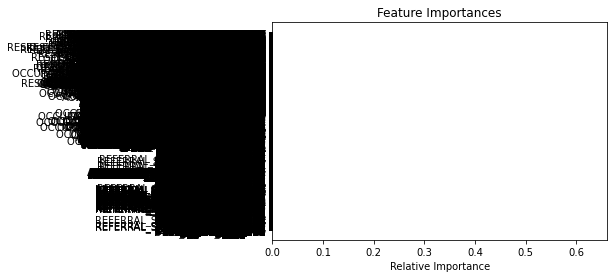

In [22]:
importances = forest.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [df_train_X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
print(sum(importances > 0.000001))

4829


In [24]:
feature_importance_file_path = f'{save_folder_paths}/all_hosp_forest_feat_impt_uc3.npy'

In [25]:
np.save(feature_importance_file_path, forest.feature_importances_ > 0)#0.000001)

In [26]:
forest = pickle.load(open(forest_file_path, 'rb'))
df_train_new_X = df_train_X.loc[:, forest.feature_importances_ > 0]#0.000001]
pkl_file_path = f'{save_folder_paths}/all_hosp_new_train_X_uc3.pkl'
df_train_new_X.to_pickle(pkl_file_path)
new_train_X_file_path = pkl_file_path
print(df_train_new_X.shape)
print(new_train_X_file_path)

(46888, 14313)
./Data Exploration/data/uc3/all_hosp_new_train_X_uc3.pkl


In [27]:
df_test_X = pd.concat([
    pd.read_pickle(X_test_file_path)
    for X_test_file_path in X_test_file_paths])
save_dir = os.path.dirname(X_test_file_paths[0])
df_test_new_X = df_test_X.loc[:, forest.feature_importances_ > 0]#0.000001]
pkl_file_path = f'{save_dir}/all_hosp_new_test_X_uc3.pkl'
df_test_new_X.to_pickle(pkl_file_path)
new_test_X_file_path = pkl_file_path
print(df_test_new_X.shape)
print(new_test_X_file_path)

(15629, 14313)
./Data Exploration/data/uc3/all_hosp_new_test_X_uc3.pkl


In [28]:
print(list(df_train_new_X.columns))

['ACTUAL_LOS', 'ACTUAL_ICU_HDU_LOS', 'ETBS_LOS', 'ETBS_ICU_HDU_LOS', 'Admission_Age', 'ACTUAL_CASE_INSTITUTION_GHL', 'ACTUAL_CASE_INSTITUTION_MEH', 'ACTUAL_CASE_INSTITUTION_PEH', 'ACTUAL_CASE_INSTITUTION_PNH', 'ACTUAL_TREATMENT_CATEGORY_2BD', 'ACTUAL_TREATMENT_CATEGORY_2BDW14', 'ACTUAL_TREATMENT_CATEGORY_4BD', 'ACTUAL_TREATMENT_CATEGORY_A1', 'ACTUAL_TREATMENT_CATEGORY_ARGON', 'ACTUAL_TREATMENT_CATEGORY_DAF', 'ACTUAL_TREATMENT_CATEGORY_DAL', 'ACTUAL_TREATMENT_CATEGORY_DC', 'ACTUAL_TREATMENT_CATEGORY_DC1', 'ACTUAL_TREATMENT_CATEGORY_DC1B', 'ACTUAL_TREATMENT_CATEGORY_DC2B', 'ACTUAL_TREATMENT_CATEGORY_DC4B', 'ACTUAL_TREATMENT_CATEGORY_DEM', 'ACTUAL_TREATMENT_CATEGORY_DLX', 'ACTUAL_TREATMENT_CATEGORY_DW1B', 'ACTUAL_TREATMENT_CATEGORY_DW2B', 'ACTUAL_TREATMENT_CATEGORY_EDLX', 'ACTUAL_TREATMENT_CATEGORY_ENDO', 'ACTUAL_TREATMENT_CATEGORY_EXE', 'ACTUAL_TREATMENT_CATEGORY_EYE', 'ACTUAL_TREATMENT_CATEGORY_GLEN', 'ACTUAL_TREATMENT_CATEGORY_HBC', 'ACTUAL_TREATMENT_CATEGORY_HDU', 'ACTUAL_TREATMENT_CA

In [29]:
feature_importances = np.load(feature_importance_file_path)
df_train_new_X2 = df_train_X.loc[:, feature_importances > 0]#0.000001]
print(df_train_new_X2.shape)

(46888, 14313)


In [30]:
scaler_pkl_file_path = f'{save_folder_paths}/all_hosp_data_uc3_scaler.pkl'
ohe_pkl_file_path = f'{save_folder_paths}/all_hosp_data_uc3_ohe.pkl'
df_test_new_X2 = dpl.transform_test_data(df_test.drop('TOTAL_HOSP', axis=1),
                                         scaler_pkl_file_path,
                                         ohe_pkl_file_path,
                                         feature_importance_file_path)
print(df_test_new_X2.shape)

(15629, 14313)
